## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Handling pre-processed data

In [2]:
df = pd.read_csv('../preprocess_data.csv')
df.drop(['task_2','text'], axis=1, inplace=True)
df.head()

,_id,task_1,task_3,task_4,text_clean
0,Gujarati_image_1618.jpg,Sarcastic,Vulgar,Abusive,છોકર). ટીચર તમાર તાજમહેલ\r\n\r\nદેખ/ય છે.\r\n\...
1,Gujarati_image_31.jpg,Sarcastic,Vulgar,Abusive,છોકરો : ના.\r\n છોકરી : કેમ?\r\n \r\n છોકરી : ...
2,Gujarati_image_1144.jpg,Sarcastic,Vulgar,Abusive,"છોકરીઓ ગમે તેટલી\r\n ચાલક હોય,\r\n \r\n પણ છોક..."
3,Gujarati_image_1184.jpg,Sarcastic,Vulgar,Abusive,"દોસ્તી કરો,પ્રેમ કરો, વફા કરો...\r\n અને બહુ મ..."
4,Gujarati_image_1643.jpg,Sarcastic,Vulgar,Abusive,"છોકરીઓ ગમે તેટલી\r\nચાલક હોય,\r\n\r\nપણ છોકરા ..."


Text(0, 0.5, 'Frequency')

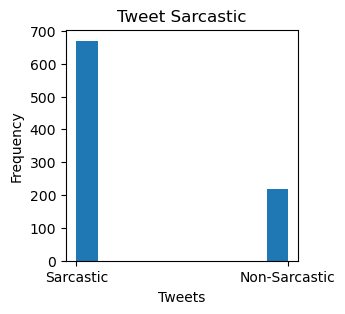

In [3]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_1'])

ax.set_title('Tweet Sarcastic')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

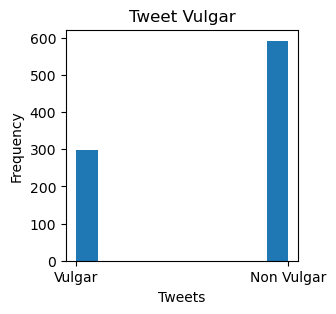

In [4]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_3'])

ax.set_title('Tweet Vulgar')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

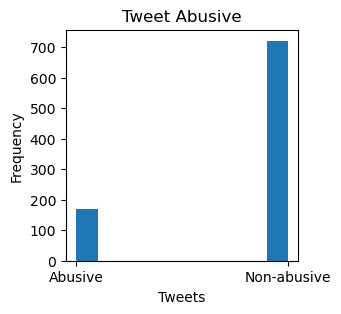

In [5]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_4'])

ax.set_title('Tweet Abusive')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

In [6]:
print(df.isnull().values.any())

True


# task_1

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_1']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [9]:
import pickle
# 保存模型和特征转换器
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidfconverter, f)

## Using various ML techniques to find the accuracy

In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[25  4]
 [68 37]]
               precision    recall  f1-score   support

Non-Sarcastic       0.27      0.86      0.41        29
    Sarcastic       0.90      0.35      0.51       105

     accuracy                           0.46       134
    macro avg       0.59      0.61      0.46       134
 weighted avg       0.77      0.46      0.49       134



In [11]:
nb1 = classifier

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, class_weight='balanced', max_iter=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[ 9 20]
 [20 85]]
               precision    recall  f1-score   support

Non-Sarcastic       0.31      0.31      0.31        29
    Sarcastic       0.81      0.81      0.81       105

     accuracy                           0.70       134
    macro avg       0.56      0.56      0.56       134
 weighted avg       0.70      0.70      0.70       134



In [13]:
lr1 = classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[  1  28]
 [  2 103]]
               precision    recall  f1-score   support

Non-Sarcastic       0.33      0.03      0.06        29
    Sarcastic       0.79      0.98      0.87       105

     accuracy                           0.78       134
    macro avg       0.56      0.51      0.47       134
 weighted avg       0.69      0.78      0.70       134



In [15]:
kn1 = classifier

In [16]:
from sklearn.model_selection import RepeatedKFold

In [17]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.7415730337078652
0.7528089887640449
0.7752808988764045
0.8068181818181818
0.8202247191011236


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.8314606741573034


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [18]:
print(metrics.classification_report(y_test,predictions))

               precision    recall  f1-score   support

Non-Sarcastic       0.43      0.24      0.31        25
    Sarcastic       0.74      0.87      0.80        63

     accuracy                           0.69        88
    macro avg       0.59      0.56      0.56        88
 weighted avg       0.65      0.69      0.66        88



In [19]:
svm1 = sv

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.7528089887640449
0.7865168539325843
0.8089887640449438
0.8314606741573034


In [21]:
print(metrics.classification_report(y_test,predictions))

               precision    recall  f1-score   support

Non-Sarcastic       0.50      0.12      0.20        16
    Sarcastic       0.83      0.97      0.90        72

     accuracy                           0.82        88
    macro avg       0.67      0.55      0.55        88
 weighted avg       0.77      0.82      0.77        88



In [22]:
rf1 = rf

In [23]:
import pickle

# 假设 kn1, lr1, nb1, rf1, svm1 是你训练好的模型对象

# 保存模型
pickle.dump(kn1, open('best_KN_model1.sav', 'wb'))
pickle.dump(lr1, open('best_LR_model1.sav', 'wb'))
pickle.dump(nb1, open('best_NB_model1.sav', 'wb'))
pickle.dump(rf1, open('best_RF_model1.sav', 'wb'))
pickle.dump(svm1, open('best_SVM_model1.sav', 'wb'))

# task_3

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_3']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

# Using various ML techniques to find the accuracy

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[23 65]
 [ 7 39]]
              precision    recall  f1-score   support

  Non Vulgar       0.77      0.26      0.39        88
      Vulgar       0.38      0.85      0.52        46

    accuracy                           0.46       134
   macro avg       0.57      0.55      0.45       134
weighted avg       0.63      0.46      0.43       134



In [27]:
nb3 = classifier

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[84  4]
 [32 14]]
              precision    recall  f1-score   support

  Non Vulgar       0.72      0.95      0.82        88
      Vulgar       0.78      0.30      0.44        46

    accuracy                           0.73       134
   macro avg       0.75      0.63      0.63       134
weighted avg       0.74      0.73      0.69       134



In [29]:
lr3 = classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[85  3]
 [39  7]]
              precision    recall  f1-score   support

  Non Vulgar       0.69      0.97      0.80        88
      Vulgar       0.70      0.15      0.25        46

    accuracy                           0.69       134
   macro avg       0.69      0.56      0.53       134
weighted avg       0.69      0.69      0.61       134



In [31]:
kn3 = classifier

In [32]:
from sklearn.model_selection import RepeatedKFold

In [33]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.6292134831460674
0.7640449438202247
0.797752808988764


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

In [34]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

  Non Vulgar       0.65      0.84      0.73        50
      Vulgar       0.65      0.39      0.49        38

    accuracy                           0.65        88
   macro avg       0.65      0.62      0.61        88
weighted avg       0.65      0.65      0.63        88



In [35]:
svm3 = sv

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.7191011235955056
0.7303370786516854
0.7528089887640449
0.7640449438202247
0.8089887640449438
0.8426966292134831


In [37]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

  Non Vulgar       0.69      0.89      0.77        54
      Vulgar       0.67      0.35      0.46        34

    accuracy                           0.68        88
   macro avg       0.68      0.62      0.62        88
weighted avg       0.68      0.68      0.65        88



In [38]:
rf3 = rf

In [39]:
import pickle

# 假设 kn3, lr3, nb3, rf3, svm3 是你训练好的模型对象

# 保存模型
pickle.dump(kn3, open('best_KN_model3.sav', 'wb'))
pickle.dump(lr3, open('best_LR_model3.sav', 'wb'))
pickle.dump(nb3, open('best_NB_model3.sav', 'wb'))
pickle.dump(rf3, open('best_RF_model3.sav', 'wb'))
pickle.dump(svm3, open('best_SVM_model3.sav', 'wb'))

# task_4

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_4']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

# Using various ML techniques to find the accuracy

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[18  2]
 [77 37]]
              precision    recall  f1-score   support

     Abusive       0.19      0.90      0.31        20
 Non-abusive       0.95      0.32      0.48       114

    accuracy                           0.41       134
   macro avg       0.57      0.61      0.40       134
weighted avg       0.84      0.41      0.46       134



In [43]:
nb4 = classifier

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[  1  19]
 [  1 113]]
              precision    recall  f1-score   support

     Abusive       0.50      0.05      0.09        20
 Non-abusive       0.86      0.99      0.92       114

    accuracy                           0.85       134
   macro avg       0.68      0.52      0.50       134
weighted avg       0.80      0.85      0.80       134



In [45]:
lr4 = classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[ 6 14]
 [31 83]]
              precision    recall  f1-score   support

     Abusive       0.16      0.30      0.21        20
 Non-abusive       0.86      0.73      0.79       114

    accuracy                           0.66       134
   macro avg       0.51      0.51      0.50       134
weighted avg       0.75      0.66      0.70       134



In [50]:
kn4 = classifier

In [51]:
from sklearn.model_selection import RepeatedKFold

In [52]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.8089887640449438
0.8539325842696629
0.898876404494382
0.9325842696629213


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

In [53]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

     Abusive       1.00      0.20      0.33        20
 Non-abusive       0.81      1.00      0.89        68

    accuracy                           0.82        88
   macro avg       0.90      0.60      0.61        88
weighted avg       0.85      0.82      0.77        88



In [54]:
svm4 = sv

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.8426966292134831
0.8651685393258427
0.8764044943820225
0.9101123595505618
0.9325842696629213


In [56]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

     Abusive       0.57      0.44      0.50         9
 Non-abusive       0.94      0.96      0.95        79

    accuracy                           0.91        88
   macro avg       0.75      0.70      0.72        88
weighted avg       0.90      0.91      0.90        88



In [57]:
rf4 = rf

In [58]:
import pickle

# 假设 kn4, lr4, nb4, rf4, svm4 是你训练好的模型对象

# 保存模型
pickle.dump(kn4, open('best_KN_model4.sav', 'wb'))
pickle.dump(lr4, open('best_LR_model4.sav', 'wb'))
pickle.dump(nb4, open('best_NB_model4.sav', 'wb'))
pickle.dump(rf4, open('best_RF_model4.sav', 'wb'))
pickle.dump(svm4, open('best_SVM_model4.sav', 'wb'))